In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
!pip install noisereduce
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import time
import noisereduce as nr
from scipy.io import wavfile
import matplotlib.pyplot as plt

import librosa
import librosa.display

from pydub import AudioSegment 
from pydub.utils import make_chunks

In [4]:
#Helper function to perform required preprocessing

#Processing audio clips to create 3 second chunks
def process_audio(filename):
    myaudio = AudioSegment.from_file(filename, "wav") 
    chunk_length_ms = 3000
    chunks = make_chunks(myaudio,chunk_length_ms)  
    print(len(chunks))
    for i, chunk in enumerate(chunks):
        filename = os.path.splitext(filename)[0]
        chunk_name = './chunked/' + filename + "_{0}.wav".format(i) 
        chunk.export(chunk_name, format="wav")

#Eliminiting noise fron audio clips
def eliminate_noise(path, filename):
    audio, sample_rate = librosa.load(path)
    reduced_noise = nr.reduce_noise(y=audio, sr=sample_rate)
    filename = os.path.splitext(filename)[0]
    wavfile.write('./reduced/' + filename + "_reduced.wav", sample_rate, reduced_noise)

#Converts audio clips to spectrograms 
def convert_to_spec(path, filename):
    x, sr = librosa.load(path)
    filename = os.path.splitext(filename)[0]
    fname = './images/' + filename + '.png'
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    fig = plt.figure(frameon = False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    fin = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    fig.savefig(fname, dpi='figure')
    plt.close();

In [5]:
!ls

data  drive  sample_data


In [6]:
#This code window performs all required preprocessing to the audio files
#This will help us study the data and create a dataset 
cwd = os.listdir('data')

for folder in cwd:
    
    data_path = './data/'+folder
    os.chdir(data_path)
    
    try:
        os.makedirs('chunked')
        os.makedirs('reduced')
        os.makedirs('images')
    except:
        pass
    
    #start_time = time.perf_counter()
    
    audio_file = os.listdir()
    for file in audio_file:
        if ('.wav' in file):
            process_audio(file)
    print("Audio Splitting Complete")
    
    #print(time.perf_counter() - start_time, "seconds")
    
    #start_time = time.perf_counter()
    
    chunked_files = os.listdir('chunked')
    for file in chunked_files:
        path = "./chunked/"+ file
        eliminate_noise(path, file)
    print("Eliminated Noise")
    
    #print(time.perf_counter() - start_time, "seconds")
    
    #start_time = time.perf_counter()
    
    reduced_files = os.listdir('reduced')
    for file in reduced_files:
        path = "./reduced/"+ file
        convert_to_spec(path, file)
    print("Spectrograms Generated")
    
    #print(time.perf_counter() - start_time, "seconds")
    
    os.chdir('../') 
    os.chdir('../') 

print("Preprocessing Complete")

600
Audio Splitting Complete
Eliminated Noise
Spectrograms Generated
Audio Splitting Complete
Eliminated Noise
Spectrograms Generated
Preprocessing Complete


In [9]:
!ls

data  drive  sample_data


In [ ]:
# convertTo16Bit('dataset')
# eliminate_noise('clean_noise/tiger.wav', 'tiger')

# Main model building
### SMM01167_20221109_182902.wav

In [2]:
!pip uninstall tensorflow
!pip uninstall tensorflow-io


Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.8/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorflow/*
Proceed (Y/n)? y
y
  Successfully uninstalled tensorflow-2.9.2


In [3]:
!pip install tensorflow-gpu==2.8.0
import tensorflow as tf

!pip install tensorflow-io==0.25.0  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.30.0
    Uninstalling tensorflow-io-gcs-filesystem-0.30.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.30.0


In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tensorflow_io==0.23.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.4/394.4 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.4/394.4 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 81.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.9 MB/s eta 0:00:00
  Created wheel 

In [6]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import os
import csv
import pandas as pd
import datetime
from itertools import groupby
from matplotlib import pyplot as plt

import tensorflow as tf 
# import tensorflow_io as tfio
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [40]:
#This function loads an audio clip and resamples it to 16000 samples/second
import librosa    

def load_wav_16k_mono(filename):
    # # Load encoded wav file
    # file_contents = tf.io.read_file(filename)
    # # Decode wav (tensors by channels) 
    # wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # # Removes trailing axis
    # wav = tf.squeeze(wav, axis=-1)
    # sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    # #wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    wav, s = librosa.load(filename, sr=16000)
 

    return wav

In [3]:
!ls
!pwd

NoMoan				  SMM01167_20221109_182902_138.wav
sample_data			  SMM01167_20221109_182902_139.wav
SMM01167_20221109_182902_110.wav  SMM01167_20221109_182902_140.wav
SMM01167_20221109_182902_114.wav  SMM01167_20221109_182902_6.wav
SMM01167_20221109_182902_117.wav  SMM01167_20221109_182902_84.wav
SMM01167_20221109_182902_119.wav  SMM01167_20221109_182902_85.wav
SMM01167_20221109_182902_122.wav  SMM01167_20221109_182902_87.wav
SMM01167_20221109_182902_127.wav  SMM01167_20221109_182902_91.wav
SMM01167_20221109_182902_128.wav  SMM01167_20221109_182902_92.wav
SMM01167_20221109_182902_135.wav  SMM01167_20221109_182902_93.wav
SMM01167_20221109_182902_137.wav  SMM01167_20221109_182902_94.wav
/content


In [10]:
#upload moan data (3 sec audio), them create Moan folder, then move them to Moan folder
!mv /content/*.wav /content/Moan

In [11]:
#Tensorflow only works with 16-bit .wav files
#This function converts them into 16-bit and stores them to the target directory

import soundfile
import os

def convertTo16Bit(directory):
    for file in os.listdir(directory):
         if(file.endswith('.wav')):
                nameSolo = file.rsplit('.', 1)[0]
                path = directory + '/' + file
                #print(directory + f'/{nameSolo}')
                data, samplerate = soundfile.read(path)

                soundfile.write('/content/Moan16BIT' + nameSolo + '_16BIT.wav', data, samplerate, subtype='PCM_16')
                #print("converting " + file + "to 16 - bit")

In [13]:
convertTo16Bit('/content/Moan')

In [14]:
!mv /content/*.wav /content/Moan16BIT

In [41]:
#Storing samples from each class for test runs
TIGER_FILE = "/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_111_16BIT.wav"
NOT_TIGER_FILE = "/content/NoMoan16BIT/NoMoan16BITSMM01167_20221109_182902_114_16BIT.wav"

In [42]:
#Loading test files and assigning them to variables
wave = load_wav_16k_mono(TIGER_FILE)
nwave= load_wav_16k_mono(NOT_TIGER_FILE)

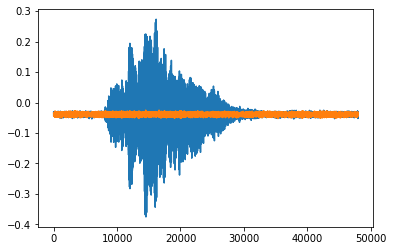

In [43]:
#Plotting example positive and negative samples
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [61]:
!ls /content/Moan16BIT/

Moan16BITSMM01167_20221109_182902_111_16BIT.wav
Moan16BITSMM01167_20221109_182902_115_16BIT.wav
Moan16BITSMM01167_20221109_182902_116_16BIT.wav
Moan16BITSMM01167_20221109_182902_118_16BIT.wav
Moan16BITSMM01167_20221109_182902_121_16BIT.wav
Moan16BITSMM01167_20221109_182902_125_16BIT.wav
Moan16BITSMM01167_20221109_182902_129_16BIT.wav
Moan16BITSMM01167_20221109_182902_130_16BIT.wav
Moan16BITSMM01167_20221109_182902_131_16BIT.wav
Moan16BITSMM01167_20221109_182902_132_16BIT.wav
Moan16BITSMM01167_20221109_182902_134_16BIT.wav
Moan16BITSMM01167_20221109_182902_136_16BIT.wav
Moan16BITSMM01167_20221109_182902_77_16BIT.wav
Moan16BITSMM01167_20221109_182902_78_16BIT.wav
Moan16BITSMM01167_20221109_182902_79_16BIT.wav
Moan16BITSMM01167_20221109_182902_80_16BIT.wav
Moan16BITSMM01167_20221109_182902_81_16BIT.wav
Moan16BITSMM01167_20221109_182902_82_16BIT.wav
Moan16BITSMM01167_20221109_182902_83_16BIT.wav
Moan16BITSMM01167_20221109_182902_86_16BIT.wav


In [44]:
#This creates a dataset from the positive and negative samples and loads them onto two variables

# this the folder for the imgs
pos = tf.data.Dataset.list_files('/content/Moan16BIT/*.wav')
neg = tf.data.Dataset.list_files('/content/NoMoan16BIT/*.wav')

In [45]:
type(pos)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [157]:
#Adding samples labels to each sample set. potsitive examples are assigned label '1' and negative samples are assigned label '0'
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
#Consolidating all samples under one variable sequentially
data = positives.concatenate(negatives)
data.as_numpy_iterator().next() , len(data)

((b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_111_16BIT.wav', 1.0),
 40)

In [141]:
negatives.as_numpy_iterator().next() 

(b'/content/NoMoan16BIT/NoMoan16BITSMM01167_20221109_182902_6_16BIT.wav', 0.0)

In [158]:
#This function loads an audio clip and converts it to a spectrogram for further processing

def preprocess(file_path, label): 
    print(file_path)
    wav = load_wav_16k_mono(file_path)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=320, window_fn=None)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    # print(spectrogram, label)
    return spectrogram, label

b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_81_16BIT.wav'  |  1.0
b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_81_16BIT.wav'


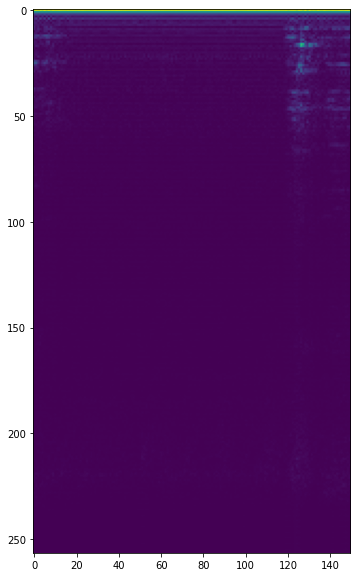

In [159]:
#Extracting one sample and plotting it's spectrogram for analysis

filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()
print(filepath, " | ", label)
spectrogram, label = preprocess(filepath, label)

plt.figure(figsize=(20,10))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

b'/content/NoMoan16BIT/NoMoan16BITSMM01167_20221109_182902_117_16BIT.wav'
b'/content/NoMoan16BIT/NoMoan16BITSMM01167_20221109_182902_117_16BIT.wav'  |  0.0
spectrogram shape  (150, 257, 1)


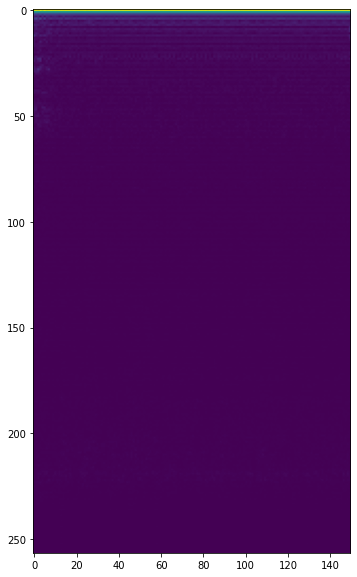

In [164]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
print(filepath, " | ", label)
print("spectrogram shape ",spectrogram.shape)
plt.figure(figsize=(20,10))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [161]:
# for i in data:
#   filepath, label = data.as_numpy_iterator().next()
#   print(filepath, " | ", label )
list(data.as_numpy_iterator())

[(b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_83_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_78_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_121_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_111_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_115_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_130_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_77_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_86_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_79_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_125_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_116_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_82_16BIT.wav', 1.0),
 (b'/content/Moan16BIT/Moan16BITSMM01167_20221109_182902_1

In [177]:
# tempData = 0
# tempData = preprocess(filepath, label)
# print(tempData)
# l = list(data.as_numpy_iterator())
# for i in range(1,len(l)):
#   tempData = tf.data.Dataset.zip((tempData, preprocess(l[i][0], l[i][1])))


In [181]:
#Creating a data loading pipeline, that shuffles the dataset and creates batches of 16 images

# data = tf.data.Dataset.map(preprocess)
data= data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

Tensor("args_0:0", shape=(), dtype=string)


TypeError: ignored

In [43]:
len(data)

8

In [44]:
#Splitting dataset into train and test sets
train = data.take(4)
test = data.skip(4).take(2)

In [45]:
len(train),len(test)

(4, 1)

In [46]:
#Extracting random example from train set
samples, labels = train.as_numpy_iterator().next()

In [47]:
#Outputs shape of example train sample. 
#This gives the input_shape for the Convolutional Neural Network
samples.shape

(5, 225, 257, 1)

In [48]:
#Creating a sequential convolutional neural network model

model = Sequential()
model.add(Conv2D(5, (3,3), activation='relu', input_shape=(225,257,1)))
model.add(Conv2D(5, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
#Model compilation
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [50]:
#Outputs model summary and model parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 255, 5)       50        
                                                                 
 conv2d_1 (Conv2D)           (None, 221, 253, 5)       230       
                                                                 
 flatten (Flatten)           (None, 279565)            0         
                                                                 
 dense (Dense)               (None, 128)               35784448  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 35,784,857
Trainable params: 35,784,857
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Initiating training instance and storing results in 'hist' variable
hist = model.fit(train, epochs=3, validation_data=test)

Epoch 1/3
4/4 [==============================] - 6s 1s/step - loss: 12.3869 - recall: 0.5000 - precision: 0.5556 - val_loss: 19.4748 - val_recall: 1.0000 - val_precision: 0.4000
Epoch 2/3
4/4 [==============================] - 7s 2s/step - loss: 10.8397 - recall: 1.0000 - precision: 0.5000 - val_loss: 0.7630 - val_recall: 1.0000 - val_precision: 0.4000
Epoch 3/3
4/4 [==============================] - 4s 917ms/step - loss: 1.5290 - recall: 0.7000 - precision: 0.7778 - val_loss: 2.6737 - val_recall: 0.2500 - val_precision: 1.0000


In [52]:
hist.history

{'loss': [12.386863708496094, 10.839667320251465, 1.5289998054504395],
 'recall': [0.5, 1.0, 0.699999988079071],
 'precision': [0.5555555820465088, 0.5, 0.7777777910232544],
 'val_loss': [19.474842071533203, 0.7629614472389221, 2.6736533641815186],
 'val_recall': [1.0, 1.0, 0.25],
 'val_precision': [0.4000000059604645, 0.4000000059604645, 1.0]}

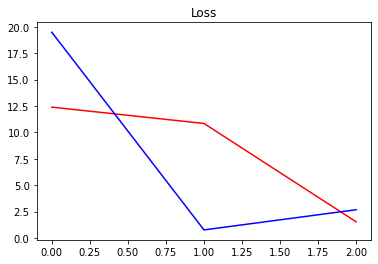

In [53]:
#Plotting Loss
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

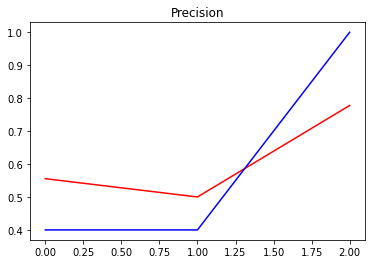

In [54]:
#Plotting Precision
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

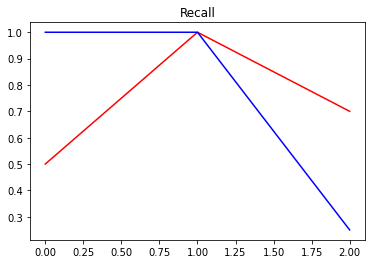

In [55]:
#Plotting Recall
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [56]:
#Extracting an example from the test set to check model performance
len(train),len(test)

(4, 1)

In [57]:
#Extracting an example from the test set to check model performance
X_test, y_test = test.as_numpy_iterator().next()

In [58]:
#Testing model by making prediction from extracted test sample
yhat = model.predict(X_test)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]
print(yhat)
print(y_test)

1/1 [==============================] - 0s 299ms/step
[0, 0, 0, 0, 0]
[1. 1. 1. 1. 1.]


## need expalnations

In [63]:
#Testing functions that will be used to ensure correctness
RECORDING = os.path.join('dataset','RECORDING','SOUND_16BIT.wav')
test_wav = load_wav_16k_mono(RECORDING)
audio_slices = tf.keras.utils.timeseries_dataset_from_array(test_wav, test_wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
samples, index = audio_slices.as_numpy_iterator().next()
samples.shape

NotFoundError: ignored

In [64]:
#This function performs required preprocessing for test dataset
def preprocess_dataset(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=320)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [65]:
#Splitting extracted sample into 3 second clips
audio_slices = tf.keras.utils.timeseries_dataset_from_array(test_wav, test_wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
#Mapping preprocessing function to extracted sample
audio_slices = audio_slices.map(preprocess_dataset)
#Creating batches of 64
audio_slices = audio_slices.batch(64)

NameError: ignored